In [2]:
#Names:  Yuri Müller Plumm (CBPF)

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Monte Carlo Simulation
df_ee = pd.read_hdf('z0_mc_ee.h5')
df_mm = pd.read_hdf('z0_mc_mm.h5')
df_tt = pd.read_hdf('z0_mc_tt.h5')
df_qq = pd.read_hdf('z0_mc_qq.h5')

#Data
df_data1 = pd.read_hdf('z0_data1.h5')
df_data2 = pd.read_hdf('z0_data2.h5')
df_data3 = pd.read_hdf('z0_data3.h5')
df_data4 = pd.read_hdf('z0_data4.h5')
df_data5 = pd.read_hdf('z0_data5.h5')
df_data6 = pd.read_hdf('z0_data6.h5')
df_data7 = pd.read_hdf('z0_data7.h5')

#Defining each channel, using the monte carlo of each channel
lista_0 = [0 for i in range(100000)]
class_ee = pd.DataFrame({'class':lista_0})
lista_1 = [1 for i in range(100000)]
class_mm = pd.DataFrame({'class':lista_1})
lista_2 = [2 for i in range(100000)]
class_tt = pd.DataFrame({'class':lista_2})
lista_3 = [3 for i in range(100000)]
class_qq = pd.DataFrame({'class':lista_3})

df_ee_final = df_ee.join(class_ee)
df_mm_final = df_mm.join(class_mm)
df_tt_final = df_tt.join(class_tt)
df_qq_final = df_qq.join(class_qq)

#Taking off some non-prhisical feature of the data that can confuse the NN
result1 = pd.concat([df_ee_final,df_mm_final,df_tt_final,df_qq_final])
result0 = result1.drop(['run','event','e_lep'],axis=1)
#result.head()

df_data1_neww = df_data1.drop(['run','event','e_lep'],axis=1)
df_data2_neww = df_data2.drop(['run','event','e_lep'],axis=1)
df_data3_neww = df_data3.drop(['run','event','e_lep'],axis=1)
df_data4_neww = df_data4.drop(['run','event','e_lep'],axis=1)
df_data5_neww = df_data5.drop(['run','event','e_lep'],axis=1)
df_data6_neww = df_data6.drop(['run','event','e_lep'],axis=1)
df_data7_neww = df_data7.drop(['run','event','e_lep'],axis=1)

In [3]:
CATEGORIES = ['Electron','Muon','Tau','Quark']

In [3]:
result0.head()

,acol,cos_thrust,cos_thrust_neg,cos_thrust_pos,d0_mean,e_ecal,e_hcal,n_charged,n_ecal,n_muons,p_charged,phi_thrust,thrust,z0_mean,class
0,0.478470,-0.857441,-0.860064,0.855789,0.012637,88.929619,0.00,2,2,0,81.328445,-118.945854,0.999992,-0.114538,0
1,0.073654,-0.360697,-0.361289,0.360372,0.026090,90.303406,0.00,2,2,0,71.335449,74.006271,1.000000,-0.052427,0
2,0.383408,-0.971304,-0.970553,0.971979,0.000000,89.632736,3.19,0,2,0,0.000000,-100.534874,0.999994,0.000000,0
3,8.977844,0.420864,0.468641,-0.395415,0.023564,90.568001,0.00,2,3,0,62.687538,35.988522,0.963187,0.694042,0
4,0.137634,-0.968132,-0.968279,0.967988,0.000000,84.347679,2.10,0,2,0,0.000000,-155.903839,0.999999,0.000000,0


In [4]:
result = result0.sample(frac=1).reset_index(drop=True)  #shuffle the rows only
#Xclass = result.drop('class',axis=0)
#yclass = result['class']


In [5]:
Xclass = result.drop('class',axis=1)
yclass = result['class']

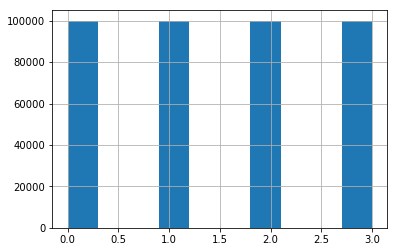

In [6]:
yclass.hist()
plt.show()

In [7]:
X_array = np.array(Xclass)
y_array = np.array(yclass)

In [8]:
N = len(y_array)#total number of simulations
N

400000

In [9]:
training_data = []

def creating_training_data():
    for i in range(int(N)):  # do dogs and cats
        try:
            event = X_array[i]  # convert to array
            tipo = y_array[i]
            training_data.append([event,tipo])
        except Exception as e:   #I should put some warning here
                pass

creating_training_data()

In [11]:
import random

random.shuffle(training_data)


In [12]:
training_data[0]

[array([ 2.64923096e-01, -8.23731348e-02, -8.01724195e-02,  8.47266018e-02,
         5.16463108e-02,  8.47425690e+01,  8.14385319e+00,  2.00000000e+00,
         3.00000000e+00,  0.00000000e+00,  9.14197083e+01, -5.21306915e+01,
         9.99928236e-01,  1.86932099e+00]), 0]

In [13]:
X = []
y = []

for imgs,types in training_data:
    
    y.append(types)
    X.append(imgs)

print(np.size(y))

400000


In [14]:
import pickle

pickle_out = open("XLEP.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("yLEP.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

# Data saved. Now we could construct our NN

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential  # for a sequential model 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
#import os
#import cv2
#from tqdm import tqdm
#import pandas as pd

import pickle

pickle_in = open("XLEP.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("yLEP.pickle","rb")
y = pickle.load(pickle_in)

X = np.array(X) #normalizing data

y = np.array(y)

In [18]:
df = 10
X_test = np.array([X[i] for i in range((len(X)//df))])
X_train = np.array([X[i] for i in range((len(X)//df),len(X))])

y_test = np.array([y[i] for i in range((len(y)//df))])
y_train = np.array([y[i] for i in range((len(y)//df),len(y))])

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
X_test[0],len(X_test[0])

(array([ 0.11159266,  0.09432856,  0.12953   ,  0.13217645, -0.01146428,
         1.27495276, -0.19179644, -0.54690403, -0.50958377, -0.61716053,
         0.01204416, -0.76040616,  0.09634945,  0.74959191]), 14)

In [22]:
import time

from tensorflow.keras.callbacks import TensorBoard

# Refazer a análise abaixo com os dados tratados corretamente:

In [23]:
dense_layers = [1,3,5]
layer_sizes = [32,64,128]
drop_layers = [0.1,0.3,0.5]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for drop_layer in drop_layers:
            NAME = "LEP-{}-dr-{}-l-{}-de-{}".format(drop_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)
            tensorboard = TensorBoard(log_dir = 'log/{}'.format(NAME))
            
            model = Sequential()
            model.add(Dense(layer_size,input_shape = (14,)))
            model.add(Activation('relu'))
            model.add(Dropout(drop_layer))                                       # dropout 10% of the neurons
#           model.add(MaxPooling2D(pool_size=(2, 2)))

#           model.add(Flatten())
            for l in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))
                model.add(Dropout(drop_layer))# dropout 10% of the neurons
            
            model.add(Dense(4))
            model.add(Activation('softmax'))
            
##qual otimizador?
            model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

            model.fit(X_train, y_train,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])



LEP-0.1-dr-32-l-1-de-1537466802
Train on 251999 samples, validate on 108001 samples
Epoch 1/10
251999/251999 [==============================] - 15s 61us/step - loss: 0.1328 - acc: 0.9532 - val_loss: 0.0626 - val_acc: 0.9780
Epoch 2/10
251999/251999 [==============================] - 14s 57us/step - loss: 0.0666 - acc: 0.9764 - val_loss: 0.0537 - val_acc: 0.9802
Epoch 3/10
251999/251999 [==============================] - 13s 52us/step - loss: 0.0583 - acc: 0.9788 - val_loss: 0.0443 - val_acc: 0.9833
Epoch 4/10
251999/251999 [==============================] - 15s 58us/step - loss: 0.0539 - acc: 0.9801 - val_loss: 0.0425 - val_acc: 0.9845
Epoch 5/10
251999/251999 [==============================] - 14s 57us/step - loss: 0.0509 - acc: 0.9811 - val_loss: 0.0412 - val_acc: 0.9841
Epoch 6/10
251999/251999 [==============================] - 15s 60us/step - loss: 0.0488 - acc: 0.9820 - val_loss: 0.0388 - val_acc: 0.9850
Epoch 7/10
251999/251999 [==============================] - 14s 57us/step - 

Epoch 6/10
251999/251999 [==============================] - 14s 57us/step - loss: 0.0680 - acc: 0.9764 - val_loss: 0.0448 - val_acc: 0.9828
Epoch 7/10
251999/251999 [==============================] - 14s 55us/step - loss: 0.0672 - acc: 0.9768 - val_loss: 0.0458 - val_acc: 0.9840
Epoch 8/10
251999/251999 [==============================] - 14s 57us/step - loss: 0.0657 - acc: 0.9773 - val_loss: 0.0455 - val_acc: 0.9836
Epoch 9/10
251999/251999 [==============================] - 15s 58us/step - loss: 0.0663 - acc: 0.9775 - val_loss: 0.0442 - val_acc: 0.9839
Epoch 10/10
251999/251999 [==============================] - 14s 54us/step - loss: 0.0641 - acc: 0.9782 - val_loss: 0.0457 - val_acc: 0.9836
LEP-0.1-dr-128-l-1-de-1537467680
Train on 251999 samples, validate on 108001 samples
Epoch 1/10
251999/251999 [==============================] - 18s 73us/step - loss: 0.0892 - acc: 0.9683 - val_loss: 0.0499 - val_acc: 0.9815
Epoch 2/10
251999/251999 [==============================] - 17s 67us/step 

Epoch 1/10
251999/251999 [==============================] - 18s 71us/step - loss: 0.3258 - acc: 0.8817 - val_loss: 0.1258 - val_acc: 0.9609
Epoch 2/10
251999/251999 [==============================] - 20s 79us/step - loss: 0.1780 - acc: 0.9508 - val_loss: 0.1103 - val_acc: 0.9661
Epoch 3/10
251999/251999 [==============================] - 22s 89us/step - loss: 0.1548 - acc: 0.9577 - val_loss: 0.0848 - val_acc: 0.9741
Epoch 4/10
251999/251999 [==============================] - 16s 65us/step - loss: 0.1401 - acc: 0.9622 - val_loss: 0.0812 - val_acc: 0.9751
Epoch 5/10
251999/251999 [==============================] - 17s 69us/step - loss: 0.1335 - acc: 0.9646 - val_loss: 0.0777 - val_acc: 0.9781
Epoch 6/10
251999/251999 [==============================] - 18s 70us/step - loss: 0.1293 - acc: 0.9651 - val_loss: 0.0764 - val_acc: 0.9768
Epoch 7/10
251999/251999 [==============================] - 18s 72us/step - loss: 0.1257 - acc: 0.9664 - val_loss: 0.0779 - val_acc: 0.9786
Epoch 8/10
251999/25

Epoch 1/10
251999/251999 [==============================] - 35s 140us/step - loss: 0.1587 - acc: 0.9459 - val_loss: 0.0713 - val_acc: 0.9739
Epoch 2/10
251999/251999 [==============================] - 31s 123us/step - loss: 0.0785 - acc: 0.9744 - val_loss: 0.0504 - val_acc: 0.9816
Epoch 3/10
251999/251999 [==============================] - 32s 128us/step - loss: 0.0700 - acc: 0.9766 - val_loss: 0.0501 - val_acc: 0.9804
Epoch 4/10
251999/251999 [==============================] - 32s 128us/step - loss: 0.0672 - acc: 0.9770 - val_loss: 0.0491 - val_acc: 0.9814
Epoch 5/10
251999/251999 [==============================] - 30s 120us/step - loss: 0.0648 - acc: 0.9776 - val_loss: 0.0468 - val_acc: 0.9826
Epoch 6/10
251999/251999 [==============================] - 27s 109us/step - loss: 0.0645 - acc: 0.9775 - val_loss: 0.0463 - val_acc: 0.9832
Epoch 7/10
251999/251999 [==============================] - 29s 113us/step - loss: 0.0627 - acc: 0.9787 - val_loss: 0.0471 - val_acc: 0.9832
Epoch 8/10
25

# The best models are:
## LEP-0.1-dr-128-l-1-de-1537063651
## LEP-0.1-dr-128-l-3-de-1537469478
## LEP-0.3-dr-128-l-1-de-1537467876

In [24]:
dense_layer = 1
layer_size = 128
drop_layer = 0.3


NAME1 = "best-LEP-{}-dr-{}-l-{}-de".format(drop_layer, layer_size, dense_layer)
print(NAME1)
tensorboard = TensorBoard(log_dir = 'log/{}'.format(NAME1))

model = Sequential()
model.add(Dense(layer_size,input_shape = (int(14),)))
model.add(Activation('relu'))
model.add(Dropout(drop_layer))                                       # dropout 10% of the neurons
#           model.add(MaxPooling2D(pool_size=(2, 2)))

#           model.add(Flatten())
for l in range(dense_layer):
    model.add(Dense(layer_size))
    model.add(Activation('relu'))
    model.add(Dropout(drop_layer))# dropout 10% of the neurons

model.add(Dense(4))
model.add(Activation('softmax'))

#tensorboard = TensorBoard(log_dir = 'log/{}'.format(NAME_final))

model.compile(loss='sparse_categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy'])

LEP_model = model.fit(X_train, y_train,
          batch_size=32,
          epochs=30,
          validation_split=0.3,
          callbacks=[tensorboard])

best-LEP-0.3-dr-128-l-1-de
Train on 251999 samples, validate on 108001 samples
Epoch 1/30
251999/251999 [==============================] - 31s 123us/step - loss: 0.1047 - acc: 0.9632 - val_loss: 0.0561 - val_acc: 0.9800
Epoch 2/30
251999/251999 [==============================] - 29s 115us/step - loss: 0.0594 - acc: 0.9780 - val_loss: 0.0461 - val_acc: 0.9831
Epoch 3/30
251999/251999 [==============================] - 33s 130us/step - loss: 0.0530 - acc: 0.9806 - val_loss: 0.0413 - val_acc: 0.9839
Epoch 4/30
251999/251999 [==============================] - 32s 128us/step - loss: 0.0502 - acc: 0.9816 - val_loss: 0.0379 - val_acc: 0.9855
Epoch 5/30
251999/251999 [==============================] - 29s 116us/step - loss: 0.0490 - acc: 0.9820 - val_loss: 0.0373 - val_acc: 0.9857
Epoch 6/30
251999/251999 [==============================] - 31s 124us/step - loss: 0.0472 - acc: 0.9824 - val_loss: 0.0369 - val_acc: 0.9861
Epoch 7/30
251999/251999 [==============================] - 32s 128us/step 

In [25]:
score = model.evaluate(X_test,y_test)
print("Loss:", score[0])
print("Accuracy:", score[1])

40000/40000 [==============================] - 2s 51us/step
Loss: 0.035254014251986515
Accuracy: 0.986725


In [26]:
nomemodelo = str(NAME1)+'.model'
nomemodelo

'best-LEP-0.3-dr-128-l-1-de.model'

In [28]:
model.save('final-LEP-0.3-dr-128-l-1-de.model')

final-LEP-0.3-dr-128-l-1-de.model


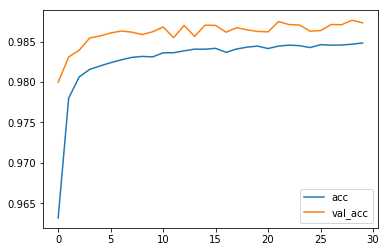

In [4]:
# import tensorboard data
tb = pd.read_csv('run_best-LEP-0.3-dr-128-l-1-de-tag-acc.csv',sep=',')
tba = pd.read_csv('run_best-LEP-0.3-dr-128-l-1-de-tag-val_acc.csv',sep=',')

print('final-LEP-0.3-dr-128-l-1-de.model')

plt.plot(tb['Value'],label = 'acc')
plt.plot(tba['Value'],label = 'val_acc')
plt.legend()
plt.show()

In [32]:
LEP_new_model = tf.keras.models.load_model('final-LEP-0.3-dr-128-l-1-de.model') #loading the model

predictions = LEP_new_model.predict([X_test]) #testing the model 


In [15]:
import random

itt= random.randint(0,len(y_test))
itt

714

In [16]:
print('Event:', CATEGORIES[y_test[itt]])

Event: Muon


In [17]:

print('Prediction:',CATEGORIES[np.argmax((predictions[itt]))])

Prediction: Muon
